[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/juansensio/IntroDLCode/blob/master/01_mnist.ipynb)

En primer lugar, descargamos los datos que usaremos para entrenar la red neuronal.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"].values.astype(np.float32), mnist["target"].values.astype(int)

/home/juan/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Vamos a visualizar algunos ejemplos de los datos que acabamos de descargar.

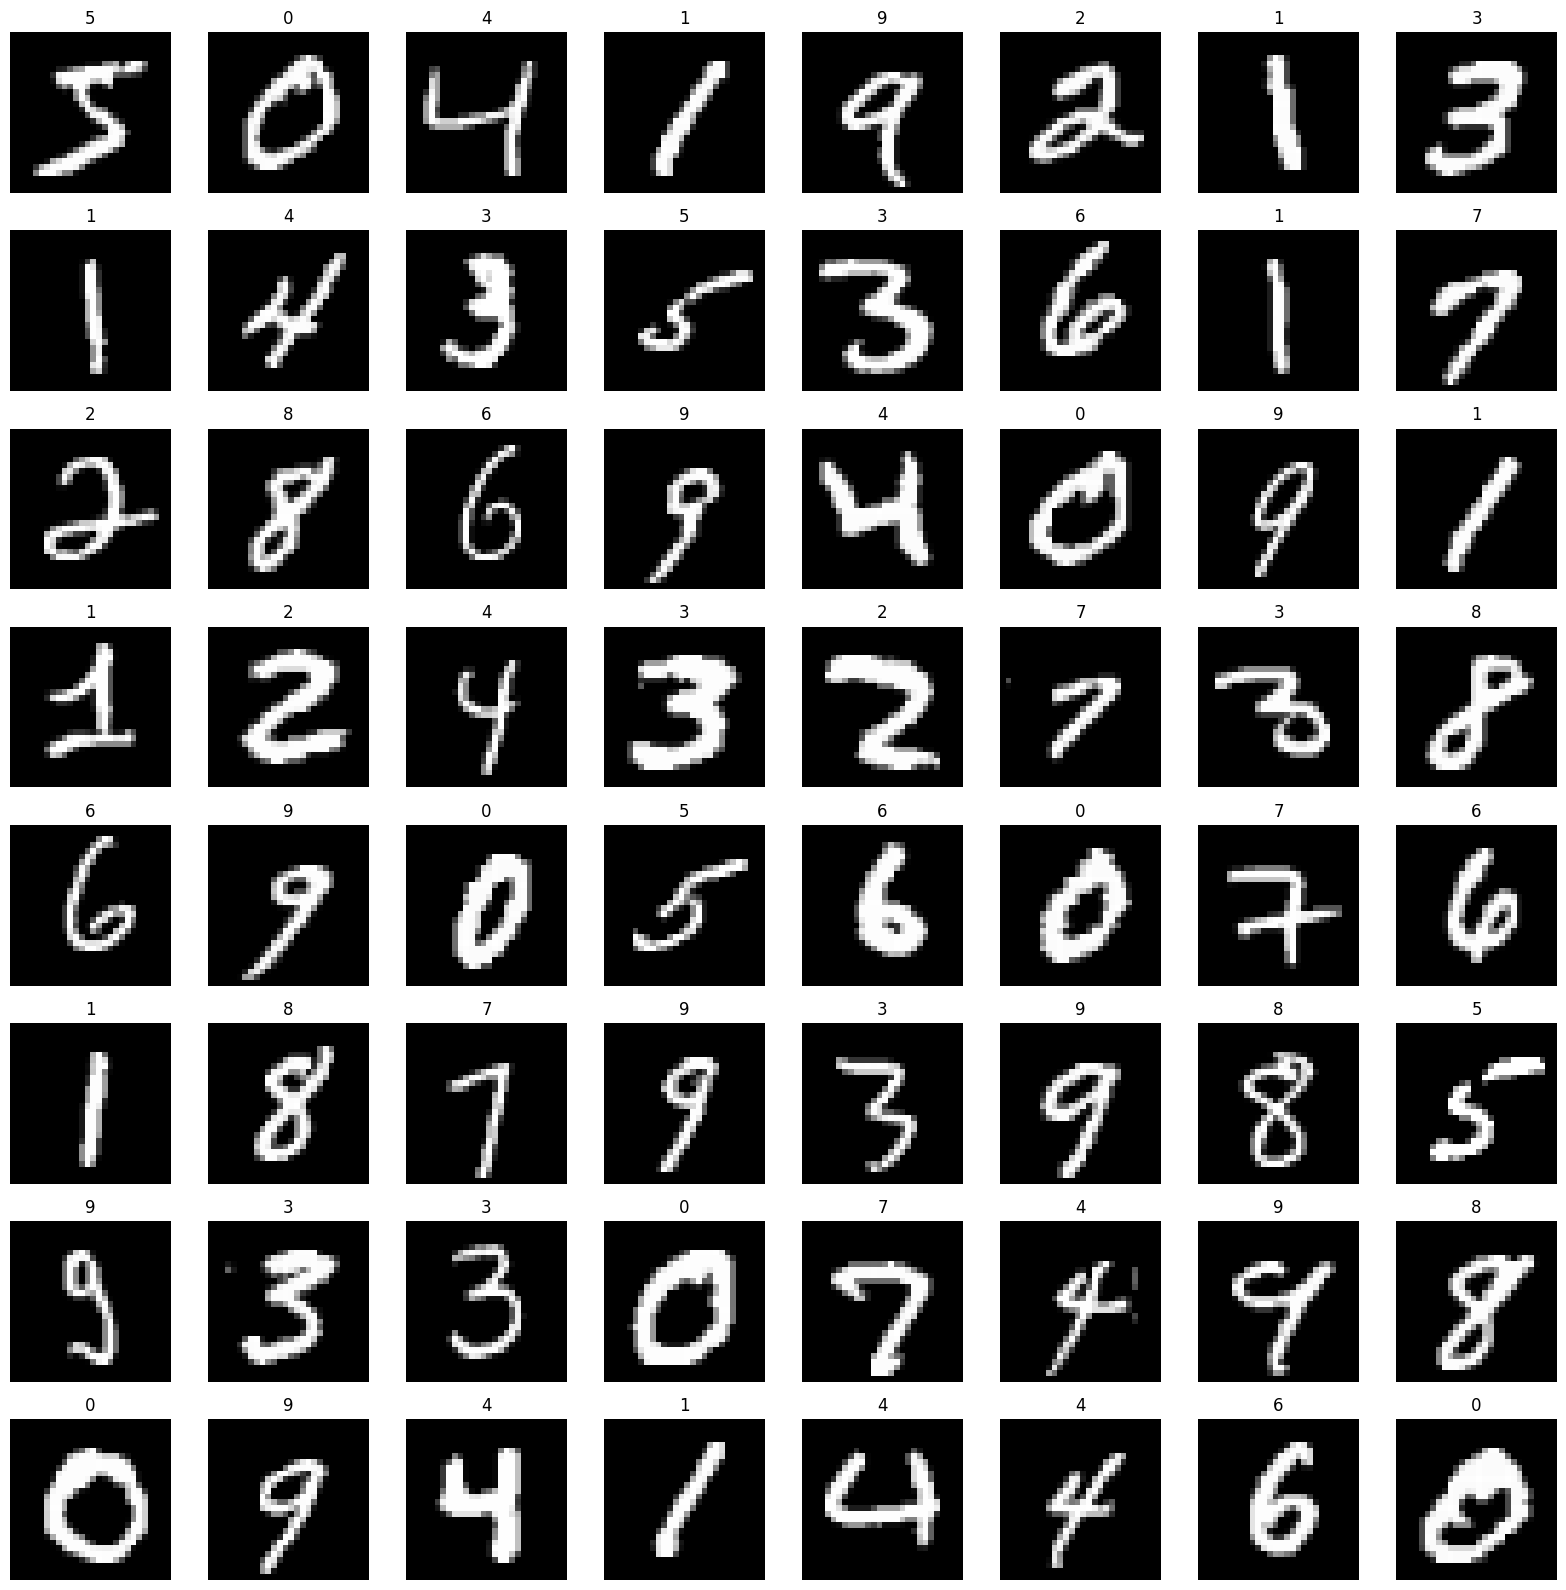

In [2]:
import matplotlib.pyplot as plt

r, c = 8, 8
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        ax.axis("off")
        ax.imshow(X[ix].reshape(28,28), cmap="gray")
        ax.set_title(y[ix])
plt.tight_layout()
plt.show()

Cada imagen tiene asociada su etiqueta, que indica el número que representa, y que es lo que queremos que nuestra red neuronal aprenda a predecir dada una imagen de entrada.

![](https://miro.medium.com/v2/resize:fit:679/0*u5-PcKYVfUE5s2by.gif)

Vamos a usar una red neuronal sencilla, conocida como perceptrón multicapa, que consiste en una serie de capas de neuronas conectadas entre sí. Cada neurona recibe como entrada las salidas de las neuronas de la capa anterior, y produce una salida que es la entrada de las neuronas de la capa siguiente.

In [3]:
from torch.nn import Sequential as S 
from torch.nn import Linear as L
from torch.nn import ReLU as R


model = S(L(784,128),R(),L(128,10))
model

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

Dado un conjunto de imágenes de entrada, la red neuronal produce una salida para cada una de ellas, que es la predicción que hace la red neuronal sobre la etiqueta de la imagen.

In [4]:
import torch 

y_hat = model(torch.tensor(X[:10]))
preds = torch.argmax(y_hat, dim=1)

preds

tensor([0, 7, 0, 0, 5, 0, 9, 0, 9, 2])

Como la red aún no está entrenada, las predicciones que hace son aleatorias. El siguiente bloque de código se encarga de entrenar la red.

In [5]:
from tqdm import tqdm 

X_train, X_test = torch.from_numpy(X[:60000] / 255.), torch.from_numpy(X[60000:] / 255.)
y_train, y_test = torch.from_numpy(y[:60000]), torch.from_numpy(y[60000:])
bs = 32
num_batches = len(X_train) // bs

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(10):
	for b in tqdm(range(num_batches)):
		x = X_train[b*bs:(b+1)*bs]
		y = y_train[b*bs:(b+1)*bs]
		y_hat = model(x)
		loss = loss_fn(y_hat, y)
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
	print(f"Epoch {epoch+1} loss: {loss.item():.3f}")

 48%|████▊     | 903/1875 [00:00<00:00, 1289.86it/s]

100%|██████████| 1875/1875 [00:01<00:00, 1248.11it/s]


Epoch 1 loss: 0.052


100%|██████████| 1875/1875 [00:01<00:00, 1202.06it/s]


Epoch 2 loss: 0.057


100%|██████████| 1875/1875 [00:01<00:00, 1201.41it/s]


Epoch 3 loss: 0.063


100%|██████████| 1875/1875 [00:01<00:00, 1195.84it/s]


Epoch 4 loss: 0.053


100%|██████████| 1875/1875 [00:01<00:00, 1191.74it/s]


Epoch 5 loss: 0.018


100%|██████████| 1875/1875 [00:01<00:00, 1192.58it/s]


Epoch 6 loss: 0.013


100%|██████████| 1875/1875 [00:01<00:00, 1197.85it/s]


Epoch 7 loss: 0.007


100%|██████████| 1875/1875 [00:01<00:00, 1186.54it/s]


Epoch 8 loss: 0.004


100%|██████████| 1875/1875 [00:01<00:00, 1192.98it/s]


Epoch 9 loss: 0.002


100%|██████████| 1875/1875 [00:01<00:00, 1189.27it/s]

Epoch 10 loss: 0.000


Una vez entrenada la red, podemos evaluar su rendimiento sobre los datos de test.

In [6]:
acc = 0
with torch.no_grad():
	for b in range(num_batches):
		x = X_test[b*bs:(b+1)*bs]
		y = y_test[b*bs:(b+1)*bs]
		y_hat = model(x)
		acc += torch.sum(torch.argmax(y_hat, dim=1) == y).item()

print(f"Accuracy: {acc} / {len(X_test)}")

Accuracy: 9776 / 10000


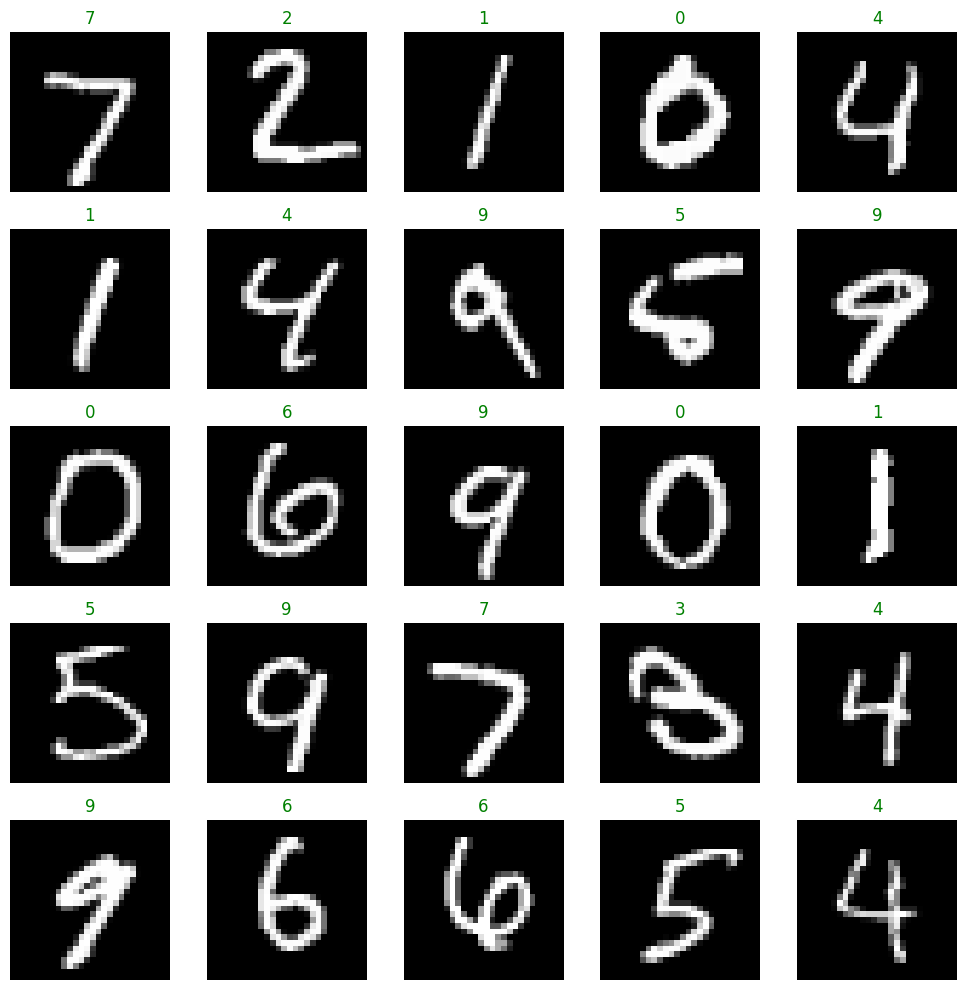

In [7]:
r, c = 5, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        ax.axis("off")
        pred = torch.argmax(model(X_test[ix]).unsqueeze(0)).item()
        ax.imshow(X_test[ix].reshape(28,28), cmap="gray")
        ax.set_title(pred, color="green" if pred == y_test[ix] else "red")
plt.tight_layout()
plt.show()

Nuestra red es capaz de predecir correctamente el 98% de las imágenes de test. ¡Felicidades! Has entrenado tu primera red neuronal.